## Red neuronal Adaline

 Las redes neuronales son una especie de dispositivos los cuales están programados de tal manera que puedan representar un cerebro humano, de esta manera simulan los procesos de aprendizaje humano, dentro de estas redes neuronales tenemos la denominada red ADALINE


Esta tiene una diferencia significativa con la red perceptron ya que esta puede emplear una regla de aprendizaje más fuerte que la del perceptrón la cual se denomina mínimo cuadrado medio.

El perceptrón por su parte se encarga de diferenciar una clase de la otra, es decir, la clasificación del perceptrón es muy básica mientras que la clasificación de ADALINE tiene una tendencia lineal, es decir que puede tomar desde valores positivos hasta negativos



## Características de la red ADALINE
Las redes adaline son redes que se parecen mucho a perceptón, la diferencia con esta es que la función de activación es lineal en lugar de ser un limitador fuerte como en Perceptrón, esta por un lado puede presentar problemas linealmente separados

## Arquitectura

La red Adaline está formada por un elemento denominado combinador adaptativo lineal el cual tiene una salida lineal obtenida del ALC el cual puede ser aplicada a un conmutador bipolar, el umbral que está debe alcanzar se representa mediante una conexión ficticia de peso W0.

## Algoritmo de aprendizaje que debe llevar una red adaline

* Inicializar los pesos en forma aleatoria
* Introducir un patrón de entrada
* Calcular la salida (y), compararla con la deseada (d) y obtener la diferencia (dp-yp)
* Multiplicar el resultado del paso anterior por la entrada correspondiente a cada uno de los pesos y ponderarla por la tasa de aprendizaje
* Actualizar los pesos, sumando al valor antiguo la cantidad obtenida en el anterior peso
* Repetir el algoritmo las veces que sean necesarias para repetir el criterio de parada

<img src=http://3.bp.blogspot.com/-THsUIgnjomY/VZ3WvLgkS-I/AAAAAAAAAJg/fl9uQ6TOpvo/s1600/Diapositiva2.JPG>
<img src=http://2.bp.blogspot.com/-DYQPeMOuFG8/VZ3W2ZtpT9I/AAAAAAAAAJo/S0IlesS3LcA/s1600/Diapositiva3.JPG>
<img src=http://2.bp.blogspot.com/-iZvJ9tNByzA/VZ3W9cP9y-I/AAAAAAAAAJw/dX_hvq7GMNU/s400/Diapositiva4.JPG>
<img src=http://3.bp.blogspot.com/-8rU4I5GQfRU/VZ3XPcxckkI/AAAAAAAAAKA/3rOmZUG20pU/s400/Diapositiva6.JPG>





## Aplicaciones de la red neuronal ADALINE en el contexto de ingeniería catastral y geodesia

* Detección de patrones de datos: la red adaline permitiría poder hallar patrones en datos relacionados con ordenamiento territorial, catastro o procesamiento digital de imágenes satelitales
* Análisis de datos económicos: Adaline podría ser aplicado para modelar tendencias económicas que pueden tener que ver con zonas de valorización.
* Sistemas de recomendaciones simples: esta puede red puede ayudar a tomar decisiones simples como por ejemplo cual sería la mejor red geodesica entre varias para hacer un proyecto cartográfico

### Modelación de la red neuronal adaline desde el SCRATCH

Para la modelación de la red adaline desde el scratch hay que tener el desarrollo matemático anteriormente descrito en los pasos anteriores y los cuales servirán para poder crear esta red, estos serán presentados en el siguiente código con el fin de poder mostrar como está diseñada una de estas redes.

In [59]:
import numpy as np
import pandas as pd

class Adaline(object):
    
    """
    Parametros que recibirá esta red neuronal
    
    eta: float
    es la tasa de aprendizaje que para evitar problemas 
    debe estar entre 0 y 1
    
    n_iter: int
    
    son las epocas en las cuales el modelo hace aprendizaje
    
    random_state: int
    
    es un número random generador de los pesos para el ajuste
    
    w_: id-array
    pesos después del entrenamiento
    
    cost_ : list
    
    suma de los cuadrados en la función de costo que se avlua en cada epoca
    """
    
    def __init__(self, eta, n_iter, random_state=14):
        self.eta= eta
        self.n_iter= n_iter
        self. random_state = random_state
        
    def fit(self, X, y):
        
        """
        x: conjunto de entrenamiento
        y: conjunto de variable explicativa
        """
        rgen=np.random.RandomState(self.random_state)
        self.w_= rgen.normal(loc=0.0, scale=0.01,size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            
            net_input= self.net_input(X)
            output= self.activation(net_input)
            errors= (y-output)
            self.w_[1:]+= self.eta * X.T.dot(errors)
            self.w_[0]+= self.eta* errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ Esta función sirve para calcular la red de entrada"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        
        #Esta función computa la activación lineal
        return X
    def predict(self,X):
        """ RETORNA LOS VALORES DE AJUSTE DESPUÉS DE CADA ÉPOCA"""
        return np.where(self.activation(self.net_input(X))>= 0.0,1,-1)
    

### Base de datos y depuración de los datos
en esta sección se revisará como hacer la depuración de los datos con el fin de poder crear una base de datos que permita entrenar al modelo de manera correcta, estos datos pertenecen a los proyectos de ejecución financiera del Departamento nacional de planeación en donde además se verán varios elementos importantes como el sector al cual pertenecen estos proyectos y además también ver los valores que se tienen para cada uno de los proyectos.

In [1]:
import pandas as pd
Ruta='DNP-EjecucionFinancieraProy.csv'
df= pd.read_csv(Ruta)

df_Nuevo= df[0:500]


/tmp/ipykernel_11407/3030607850.py:3: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(Ruta)


In [101]:
df_Nuevo.head(2)

,BPIN,Nombre del proyecto,Sector,Fuentedefinanciación,Horizonte,Vigencia,ValorSolicitado,ValorInicial,ValorVigente,ValorComprometido,ValorObligado,ValorPagado,EntidadResponsable,TipoEntidadFuenteFinanciacion,CodigoEntidadFuenteFinanciacion,EntidadFuenteFinanciacion,TipoRecursoFuenteFinanciacion,CodigoEntidadResponsable
0,2018011000972,Mejoramiento Rehabilitacion Construccion Mant...,Transporte,PGN - Presupuesto General de la Nación,2019-2040,2040,7.059970e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Agencia Nacional de Infraestructura - ANI - Tr...,Entidades Presupuesto Nacional - PGN,241300,Agencia Nacional de Infraestructura - ANI - Tr...,PGN - Nación - Inversión,241300
1,0041007170000,Mejoramiento Y Mantenimiento Carretera Patico-...,Transporte,PGN - Presupuesto General de la Nación,2001-2021,2013,1.000000e+10,9.000000e+09,9.000000e+09,9.000000e+09,8.259759e+09,6.448792e+09,Instituto Nacional de Vias - Transporte,Entidades Presupuesto Nacional - PGN,240200,Instituto Nacional de Vias - Transporte,PGN - Nación - Inversión,240200


In [3]:
df_Nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BPIN                             500 non-null    object 
 1   Nombre del proyecto              500 non-null    object 
 2   Sector                           500 non-null    object 
 3   Fuentedefinanciación             500 non-null    object 
 4   Horizonte                        500 non-null    object 
 5   Vigencia                         500 non-null    int64  
 6   ValorSolicitado                  500 non-null    float64
 7   ValorInicial                     500 non-null    float64
 8   ValorVigente                     500 non-null    float64
 9   ValorComprometido                500 non-null    float64
 10  ValorObligado                    500 non-null    float64
 11  ValorPagado                      500 non-null    float64
 12  EntidadResponsable    

## Filtrado de datos
Por practicidad del modelo se filtrará de acuerdo a dos valores en especifico de los sectores, por una parte se encuentra el del sector de transporte y por el otro lado el de planeación, además de esto se escogerá dentro de un rango de 500 datos ya que el entrenamiento de un modelo requiere de mucho sistema para poder realizarlo

In [4]:
sector=[]
ValorInicial=[]
ValorSolicitado=[]
ValorComprometido=[]
ValorObligado=[]
ValorPagado=[]

for a,b,c,d,e,f in zip(df_Nuevo['Sector'],df_Nuevo['ValorInicial'], df_Nuevo['ValorSolicitado'],
                       df_Nuevo['ValorComprometido']
                        ,df_Nuevo['ValorObligado'],df_Nuevo['ValorPagado']):
    if a== 'Transporte' or a=='Planeación':
        sector.append(a)
        ValorInicial.append(b)
        ValorSolicitado.append(c)
        ValorComprometido.append(d)
        ValorObligado.append(e)
        ValorPagado.append(f)

In [5]:
df_f={'Sector':sector,'ValorInicial':ValorInicial, 'ValorSolicitado':ValorSolicitado,
     'ValorComprometido':ValorComprometido,'ValorObligado':ValorObligado, 'ValorPagado':ValorPagado}

df=pd.DataFrame(df_f)

In [6]:
df.head(5)

,Sector,ValorInicial,ValorSolicitado,ValorComprometido,ValorObligado,ValorPagado
0,Transporte,0.000000e+00,7.059970e+10,0.000000e+00,0.000000e+00,0.000000e+00
1,Transporte,9.000000e+09,1.000000e+10,9.000000e+09,8.259759e+09,6.448792e+09
2,Planeación,1.870000e+10,1.867078e+10,1.785346e+10,1.617853e+10,1.617031e+10
3,Transporte,2.000000e+09,0.000000e+00,2.000000e+09,0.000000e+00,0.000000e+00
4,Transporte,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.327554e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sector             104 non-null    object 
 1   ValorInicial       104 non-null    float64
 2   ValorSolicitado    104 non-null    float64
 3   ValorComprometido  104 non-null    float64
 4   ValorObligado      104 non-null    float64
 5   ValorPagado        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [8]:
df['Sector'].astype(str)

0      Transporte
1      Transporte
2      Planeación
3      Transporte
4      Transporte
          ...    
99     Transporte
100    Transporte
101    Transporte
102    Transporte
103    Transporte
Name: Sector, Length: 104, dtype: object

In [62]:
X = df.iloc[0:104, [2, 3]].values

In [63]:
y = df.iloc[0:104, 0].values
y = np.where(y == 'Transporte', -1, 1)


### Después de haber hecho el filtrado de datos se procederá a entrenar la red neuronal con los datos que se proporcionaron anteriormente y la etiqueta que se predecirá será el sector al cual pertenecen de acuerdo a los datos proporcionados, es importante mencionar que se crearán dos redes neuronales, la primera tendrá una tasa de aprendizaje de 0.01 y la segunda tendrá una tasa de aprendizaje de 0.0001

In [70]:
ada1=Adaline(n_iter=10, eta=0.01).fit(X,y)
ada2 = Adaline(n_iter=10, eta=0.0001).fit(X, y)

/tmp/ipykernel_11407/921596914.py:51: RuntimeWarning: overflow encountered in square
  cost=(errors**2).sum()/2.0


### Al haber creado estas dos redes, se verá la suma de los errores cuadrados a ver que sucede mediante unas gráficas que se explicarán a continuación

Text(0.5, 1.0, 'Adaline - tasa de aprendizaje del  0.0001')

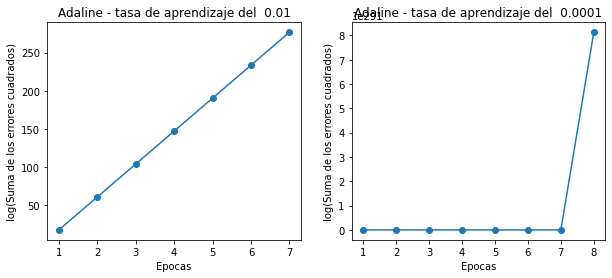

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epocas')
ax[0].set_ylabel('log(Suma de los errores cuadrados)')
ax[0].set_title('Adaline - tasa de aprendizaje del  0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epocas')
ax[1].set_ylabel('log(Suma de los errores cuadrados)')
ax[1].set_title('Adaline - tasa de aprendizaje del  0.0001')




In [95]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])
 
     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())

     # plot class examples
     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

     

In [91]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


In [93]:
ada_gd = Adaline(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

## Como se puede ver, la red neuronal no tiene un espectro de clasificación ya que por la cantidad de datos, no se puede esperar que este tenga una un espectro de clasificación bastante bueno, esto es debido a que probablemente la gran mayoría de los datos pertenecían a un sector en especial y había muy pocos del otro sector, por lo cual este modelo no serviría para predecir por el entrenamiento que tiene

/tmp/ipykernel_11407/4208624488.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


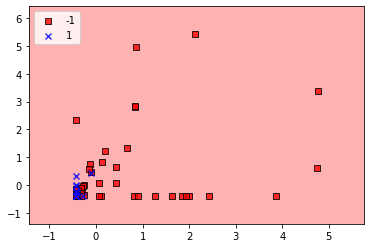

In [97]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.legend(loc='upper left')

### Como último pasao y solo para asegurar se hace una pequeña predicción la cual no servirá de nada por el entrenamiento del modelo, pero sólo se hará para probar que el código sea bueno

In [99]:
x=[7800000000, 495000000]

In [100]:
ada_gd.predict(x)

array(-1)

## Conclusiones de esta red neuronal

Se puede concluir de esta red neuronal que es muy buena para poder tomar decisiones básicas, en este caso la decisión de ver si el proyecto pertenece al sector de transporte o al sector de planeación, esto podría ayudar a acelerar procesos de tomas de decisiones en los ministerios y que además estos proyectos puedan ser radicados con más eficiencia y eficacia para poder tener un mejor panorama de lo que se pretende hacer en el país, lo cual dentro de la ingeniería catastral y geodesia sería de mucha ayuda en materia de toma de decisiones en los planes de ordenamiento territorial.